In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot

plt.style.use('ggplot')

In [76]:
data=pd.read_excel("C:/Users/Hajra Hai/Desktop/Delivery truck trip data.xlsx")

In [77]:
data.shape

(6880, 32)

In [78]:
#Show the features ( —columns) and the data in the dataframe
data.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [79]:
#Show the features ( —columns) and the data in the dataframe
data.tail()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6879,JTECH,WDSBKTP42858,Regular,2019-03-28 17:55:17,KA51D1317,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


In [80]:
#Get a summary on the dataframe including datatypes and shape.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

In [81]:
#finding null values in the dataset
data.isnull().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

In [82]:
#dropping columns as almost 60% of the enteries are missing
data.drop('Minimum_kms_to_be_covered_in_a_day', axis=1, inplace=True)

In [83]:
#dropping unnecessary columns
data.drop('Curr_lat', axis=1, inplace=True)
data.drop('Curr_lon', axis=1, inplace=True)
data.drop('Data_Ping_time', axis=1, inplace=True)

In [84]:
#replacing the null values with mean on the 'TRANSPORTATION_DISTANCE_IN_KM' column
data['TRANSPORTATION_DISTANCE_IN_KM'] = data['TRANSPORTATION_DISTANCE_IN_KM'].fillna(data['TRANSPORTATION_DISTANCE_IN_KM'].mean())

In [85]:
#finding incorrect values for trip start date
data.sort_values('trip_start_date').head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,...,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",1899-12-30 04:06:00,...,1899-12-30 03:21:00,41.000000,40 FT 3XL Trailer 35MT,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK
6264,NaN,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",1899-12-30 08:58:00,...,1899-12-30 08:13:00,51.000000,40 FT Flat Bed Multi-Axle 27MT - Trailer,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55471,SUNITA CARRIERS PRIVATE LIMITED,FXUWB-LID COVER
5910,NaN,WDSBKTP41957,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",2019-03-19 11:45:22,...,2019-03-19 11:00:22,553.856282,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55075,Sri Ayyappan Agencies,COOLANT HOSE / RADIATOR TO ENGINE
6631,NaN,WDSBKTP41973,Regular,2019-03-18 16:24:18,TN20AJ1188,"Kanchipuram, Tamil Nadu, India","Periyapatti, Tamil Nadu, India","12.8341735,79.7036402","11.2044996,78.1421905",2019-03-20 18:00:18,...,2019-03-20 17:15:18,553.856282,22 FT Taurus Open 16MT - HCV,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,A114 Alternator(New Versa)
5912,NaN,WDSBKTP41974,Regular,2019-03-18 16:56:02,TN25AT7677,"Sedarapet, India","Mylasandra, Bengaluru, Karnataka, India","12.0001,79.74839949999999","12.853929,77.6178125",2019-03-20 12:38:02,...,2019-03-20 11:53:02,553.856282,24 | 26 FT Taurus Open 21MT - HCV,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,999,Unknown,COOLANT HOSE


In [86]:
#6868,6264 index rows having years as 1899 in all datetime features, may be it's a mistake
#As we have mistake in those 2 rows let's remove those
data.drop(data.index[[6868,6264]], inplace=True)

In [87]:
#creating a single column 'ontime/delay' from 'ontime' and 'delay' columns
#'1' represents ontime and '0' represents delay
data['ontime/delay']=data.ontime.replace({np.NaN, 'G'}, {'0', '1'})
# data['ontime']=data.ontime.replace({np.NaN, 'G'}, {'0', '1'})
# data['delay']=data.delay.replace({np.NaN, 'R'}, {'0', '1'})
# data.head()
data.head()
data.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped,ontime/delay
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-21 18:59:01.000,...,320.0,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE,1
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 20:22:22.827,...,103.0,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143,0
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-31 21:59:24.987,...,300.0,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO,0
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:48:24.503,...,61.0,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD,0
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-09-01 05:23:19.243,...,240.0,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT,0


In [88]:
#dropping null values in 'current location' column since they are just 10%
#feature like gps provider, data ping time, current location, curr_lat, curr_lon having null values in same rows
#all the above mentioned features are dependent on each other and it's not feasible to impute those, so let's drop those rows

data.dropna(how='any', subset=['Current_Location'], inplace=True)

In [89]:
#finding null values in the dataset
data.isnull().sum()

GpsProvider                         0
BookingID                           0
Market/Regular                      0
BookingID_Date                      0
vehicle_no                          0
Origin_Location                     0
Destination_Location                0
Org_lat_lon                         0
Des_lat_lon                         0
Planned_ETA                         0
Current_Location                    0
DestinationLocation                 0
actual_eta                         26
ontime                           4324
delay                            1579
OriginLocation_Code                 3
DestinationLocation_Code           27
trip_start_date                     0
trip_end_date                     194
TRANSPORTATION_DISTANCE_IN_KM       0
vehicleType                       828
Driver_Name                      2475
Driver_MobileNo                  3235
customerID                          0
customerNameCode                    0
supplierID                          0
supplierName

In [90]:
data['vehicle_states'] = data.vehicle_no.astype(str).str[:2]
data['Origin_states'] = data['Origin_Location'].str.split(',').apply(lambda x: x[-1])
data['Dest_states'] = data['Destination_Location'].str.split(',').apply(lambda x: x[-1])

In [91]:
#Performing Camel Case on the following field's values
data['vehicle_states']=data['vehicle_states'].replace(('tn', 'hr'), ('TN', 'HR'))

data['Origin_states']=data['Origin_states'].replace((' Maharashtra', 'TAMIL NADU', ' Gujarat', ' Tamil Nadu',
                                                     'RAJASTHAN', ' Haryana', 'PONDICHERRY',
                                                     ' Karnataka', 'KARNATAKA', 'GUJARAT', 'HARYANA', ' Rajasthan', 
                                                     ' Uttar Pradesh', ' Pondicherry', ' West Bengal', ' Odisha',
                                                     ' Jharkhand', ' Bihar', ' Assam', ' Andhra Pradesh', ' Telangana',
                                                     ' Chattisgarh', ' Delhi', ' Kerala', ' Chandigarh', ' India', 
                                                     'UTTAR PRADESH'),
                                                    ('Maharashtra', 'Tamil Nadu', 'Gujarat', 'Tamil Nadu',
                                                     'Rajasthan', 'Haryana', 'Pondicherry',
                                                     'Karnataka', 'Karnataka', 'Gujarat', 'Haryana', 'Rajasthan',
                                                     'Uttar Pradesh', 'Pondicherry', 'West Bengal', 'Odisha',
                                                     'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
                                                     'Chattisgarh', 'Delhi', 'Kerala', 'Chandigarh', 'India',
                                                     'Uttar Pradesh'))

data['Dest_states']=data['Dest_states'].replace((' Tamil Nadu', 'TAMIL NADU', 'RAJASTHAN', ' Maharashtra',
       'KARNATAKA', 'PONDICHERRY', 'MAHARASHTRA', ' Haryana', ' Gujarat',
       'GUJARAT', 'JHARKHAND', 'Haryana', ' Himachal Pradesh',
       ' Karnataka', ' Assam', 'HARYANA', ' Uttar Pradesh',
       'HIMACHAL PRADESH', ' West Bengal', ' Odisha', ' Rajasthan',
       ' Andhra Pradesh', ' Jharkhand', ' Telangana', ' Punjab', ' Delhi',
       ' Central Development Region', ' Madhya Pradesh', ' Meghalaya',
       ' Chattisgarh', ' Jammu & Kashmir', ' Uttarakhand', ' Chandigarh',
       ' Bihar', ' Pondicherry', ' Kerala', ' Dadra & Nagar Haveli',
       ' Goa', ' Sikkim', ' India'),
       ('Tamil Nadu', 'Tamil Nadu', 'Rajasthan', 'Maharashtra',
       'Karnataka', 'Pondicherry', 'Maharashtra', 'Haryana', 'Gujarat',
       'Gujarat', 'Jharkhand', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Assam', 'Haryana', 'Uttar Pradesh',
       'Himachal Pradesh', 'West Bengal', 'Odisha', 'Rajasthan',
       'Andhra Pradesh', 'Jharkhand', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Pondicherry', 'Kerala', 'Dadra & Nagar Haveli',
       'Goa', 'Sikkim', 'India'))

In [92]:
#simplifying the name of states
for i in data.index:
    if data['Origin_states'][i]=='India':
        if data['Origin_Location'][i]=='Sedarapet, India':           
            data['Origin_states'][i]='Pondicherry'
        elif data['Origin_Location'][i]=='Kanchipuram, Tamil Nadu, India':
            data['Origin_states'][i]='Tamil Nadu'
        elif data['Origin_Location'][i]=='Karnataka 562114, India':
            data['Origin_states'][i]='Karnataka'
        elif data['Origin_Location'][i]=='Sedarapet, Pondicherry, India':
            data['Origin_states'][i]='Pondicherry'
        elif data['Origin_Location'][i]=='Pondicherry, Puducherry, India':
            data['Origin_states'][i]='Pondicherry'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [93]:
#simplifying the name of states
for i in data.index:
    if data['Dest_states'][i]=='India':
        if data['Destination_Location'][i]=='Gaya, Bihar, India':
            data['Origin_states'][i]='Bihar'
        elif data['Destination_Location'][i]=='Nizamabad, Telangana, India':
            data['Origin_states'][i]='Telangana'
        elif data['Destination_Location'][i]=='Bhogipur, Uttar Pradesh, India':
            data['Origin_states'][i]='Uttar Pradesh'
        elif data['Destination_Location'][i]=='Pondicherry, Puducherry, India':
            data['Origin_states'][i]='Pondicherry'
        elif data['Destination_Location'][i]=='Sheikhpura, Bihar, India':
            data['Origin_states'][i]='Bihar'
        elif data['Destination_Location'][i]=='Bhagalpur, Bihar, India':
            data['Origin_states'][i]='Bihar'
        elif data['Destination_Location'][i]=='Kothamangalam, Kerala, India':
            data['Origin_states'][i]='Kerala'
        elif data['Destination_Location'][i]=='Kanchipuram, Tamil Nadu, India':
            data['Origin_states'][i]='Tamil Nadu'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path

In [94]:
from geopy import distance

#let's find the distance between origin and destination
distances_km = []
for row in data.itertuples(index=False):
    distances_km.append(distance.distance(row.Org_lat_lon, row.Des_lat_lon).km)

data['Org_Dest_distance'] = distances_km

# Missing Value Treatment

In [95]:
#let's check the percentage of null values in each feature
for col in data.columns:
    if data[col].isna().sum()>0:
        print(col, data[col].isna().mean().round(4)*100)

actual_eta 0.44
ontime 73.1
delay 26.69
OriginLocation_Code 0.05
DestinationLocation_Code 0.45999999999999996
trip_end_date 3.2800000000000002
vehicleType 14.000000000000002
Driver_Name 41.839999999999996
Driver_MobileNo 54.690000000000005


In [96]:
#let's name unkown for null values in driver name
data['Driver_Name']=data['Driver_Name'].fillna('Unknown')

#name unkown for null values in vehicle type
data['vehicleType']=data['vehicleType'].fillna('Unknown')

#fill pervious date for actual.eta
data['actual_eta']=data['actual_eta'].fillna(method='ffill')

In [97]:
#impute null values in trip_end_date
import datetime
import random
df_sub=data[data['trip_end_date'].isna()]
for i in df_sub.index:
    if df_sub['ontime/delay'][i]==0:
        df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
    else:
        df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

data=pd.concat([data, df_sub])

#remove duplicates as we have concatinationg those null in trip_end_date
data.dropna(subset=['trip_end_date'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploring the dataset

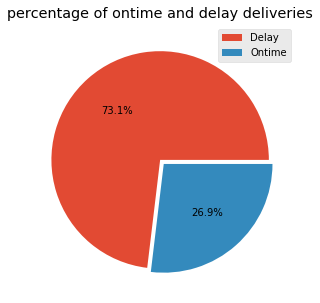

In [98]:
#pie chart for percentage of ontime and delay deliveries
plt.rcParams['figure.figsize']=(5,5)
plt.pie(data['ontime/delay'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('percentage of ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

In [99]:
#ontime deliveries stats
print('star supliers with more number of ontime delivery')
data[data['ontime/delay']=="On-time"][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with more number of ontime delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,


In [100]:
#Distance covered stats for ontime deliveries
print('star supliers with distance covered(ontime)')
data[data['ontime/delay']=="On-time"][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with distance covered(ontime)


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,


In [101]:
#delay deliveries stats
print('star supliers with more number of delay delivery')
data[data['ontime/delay']=="Delay"][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with more number of delay delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,


In [102]:
#Distance covered stats for delayed deliveries
print('star supliers with distance covered(delay)')
data[data['ontime/delay']=="Delay"][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with distance covered(delay)


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,


In [103]:
#checking the supplier code for the unknown suppliers
data[data['supplierNameCode']=='Unknown']['supplierID'].value_counts()

999    316
Name: supplierID, dtype: int64

In [104]:
#checking whether having driver's mobile number making any impact on ontime delivery
data['Driver_MobileNo'].values[data['Driver_MobileNo'].values>0]=1
data['Driver_MobileNo'].fillna(0, inplace=True)
data[data['Driver_MobileNo']==1]['ontime/delay'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


1    2003
0     677
Name: ontime/delay, dtype: int64

In [105]:
data[data['Driver_MobileNo']==0]['ontime/delay'].value_counts()

1    2321
0     914
Name: ontime/delay, dtype: int64

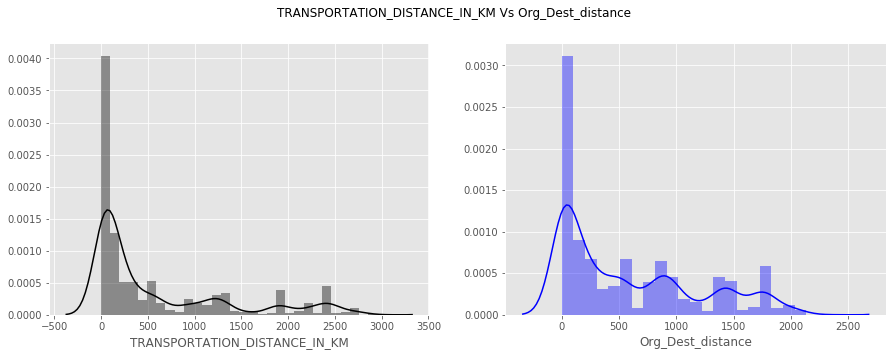

In [106]:
#checking the pattern of 'transportation in km' vs 'distance between origin and destination'
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
sns.distplot(data['TRANSPORTATION_DISTANCE_IN_KM'], color='black')

plt.subplot(122)
sns.distplot(data['Org_Dest_distance'], color='blue')

plt.suptitle('TRANSPORTATION_DISTANCE_IN_KM Vs Org_Dest_distance')
plt.show()

In [107]:
#fraudulant entries by suppliers
data[data['Org_Dest_distance']==0][['TRANSPORTATION_DISTANCE_IN_KM', 'supplierNameCode']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='plasma')

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
ARVINTH TRANSPORT,16450.000000
ESWAR TRANSPORT,15381.000000
VJ LOGISTICS,9379.000000
KASAM TRANSPORT SERVICE,7740.000000
SUSEE TRANSPORTER,4661.000000
Sree Sakthi Transport,4430.850259
SR TRANSPORTS,3540.000000
VIRS TEMPO SERVICE,2340.000000
S R LOGISTICS,2340.000000


In [108]:
#bar graph of vehicle against ontime deliveries
plt.rcParams['figure.figsize']=10,5
sns.countplot(data[data['ontime/delay']=="On-time"]['vehicleType'],
             order=data[data['ontime/delay']=="On-time"]['vehicleType'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('Vehicle with most successful ontime delivery')
plt.show()

ValueError: min() arg is an empty sequence

By this result, we can see that we don't have vehicletype data for most of the record. Definetly we shoud have record of vehicle type to get the suppliers having star vehicle. By this we can see the second most successful star vehicle which making more number of ontime delivery is '32 FT Multi-Axle 14MT - HCV'

In [109]:
#bar graph of suppliers against ontime deliveries
plt.rcParams['figure.figsize']=10,5
sns.countplot(data[data['ontime/delay']=="On-time"]['supplierNameCode'],
             order=data[data['ontime/delay']=="On-time"]['supplierNameCode'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('suppliers with most successful ontime delivery')
plt.show()

ValueError: min() arg is an empty sequence

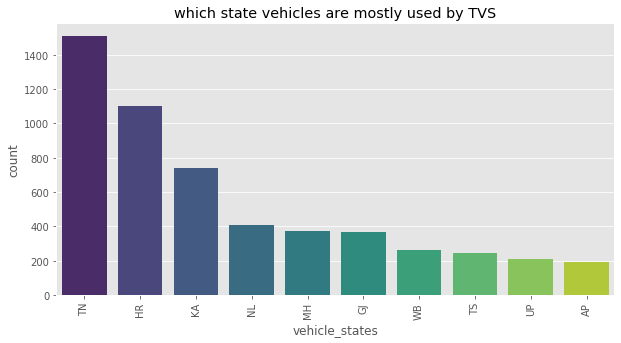

In [110]:
#bar graph of state vehicle against TVS
plt.rcParams['figure.figsize']=10,5
sns.countplot(data['vehicle_states'],
             order=data['vehicle_states'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('which state vehicles are mostly used by TVS')
plt.show()

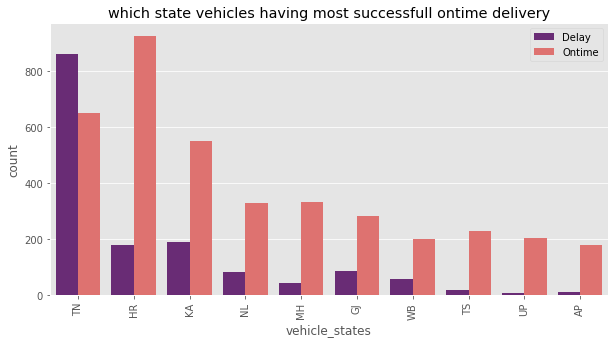

In [111]:
#bar graph of state vehicles against ontime deliveries
plt.rcParams['figure.figsize']=10,5
sns.countplot(data['vehicle_states'],
             order=data['vehicle_states'].value_counts().head(10).index,
              hue=data['ontime/delay'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which state vehicles having most successfull ontime delivery')
plt.legend(['Delay', 'Ontime'])
plt.show()

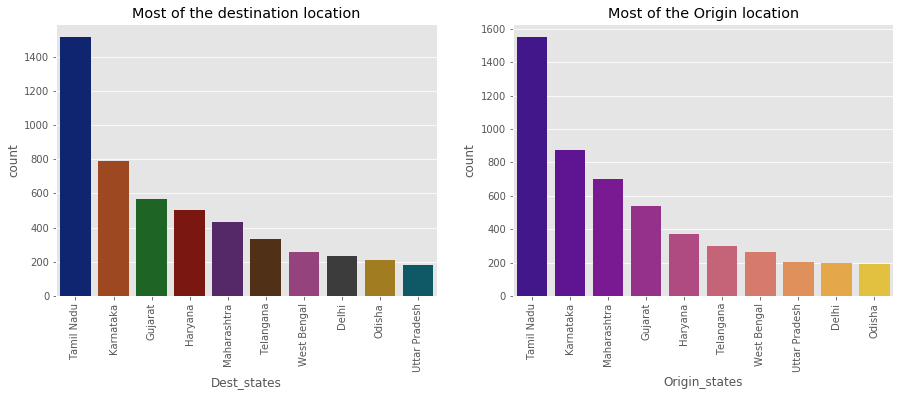

In [112]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
sns.countplot(data['Dest_states'],
             order=data['Dest_states'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the destination location')

plt.subplot(122)
sns.countplot(data['Origin_states'],
             order=data['Origin_states'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Origin location')

plt.show()

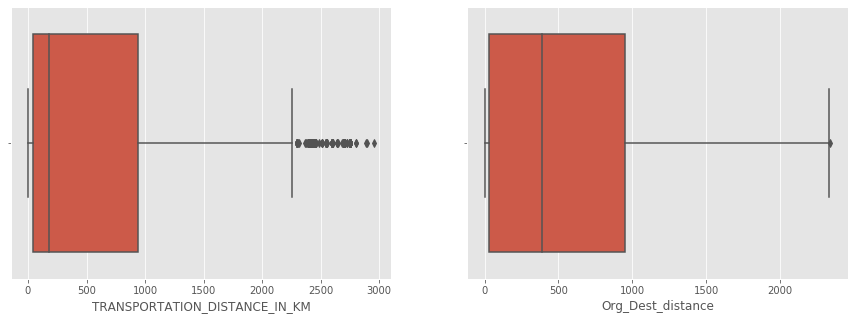

In [113]:
#box plot to find outliers
plt.subplot(121)
sns.boxplot(data['TRANSPORTATION_DISTANCE_IN_KM'])

plt.subplot(122)
sns.boxplot(data['Org_Dest_distance'])
plt.show()

we don't have major outliers in our data

# Feature Encoding

In [114]:
#filter usefull data alone
df_cln=data[['Market/Regular ',
       'vehicle_no',
       'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID',
       'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [115]:
df_cln['vehicle_no']=df_cln.vehicle_no.astype("category").cat.codes
df_cln['customerID']=df_cln.customerID.astype("category").cat.codes
df_cln['supplierID']=df_cln.supplierID.astype("category").cat.codes
df_cln['Current_Location']=df_cln.Current_Location.astype("category").cat.codes
df_cln['vehicleType']=df_cln.vehicleType.astype("category").cat.codes
df_cln['Material Shipped']=df_cln['Material Shipped'].astype("category").cat.codes
df_cln['Market/Regular ']=df_cln['Market/Regular '].astype("category").cat.codes
df_cln['Driver_Name']=df_cln['Driver_Name'].astype("category").cat.codes
df_cln['vehicle_states']=df_cln.vehicle_states.astype("category").cat.codes
df_cln['Origin_states']=df_cln['Origin_states'].astype("category").cat.codes
df_cln['Dest_states']=df_cln['Dest_states'].astype("category").cat.codes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [118]:
#correlation of columns against ontime/delay column
corr_matrix=df_cln.corr()
corr_matrix['ontime/delay'].sort_values(ascending=False)

KeyError: 'ontime/delay'

In [117]:
x=df_cln.drop('ontime/delay', axis=1)
y=df_cln['ontime/delay'].values

# Scaling Treatment

In [45]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaled=sc.fit_transform(x)
x_scl=pd.DataFrame(scaled, columns=x.columns)

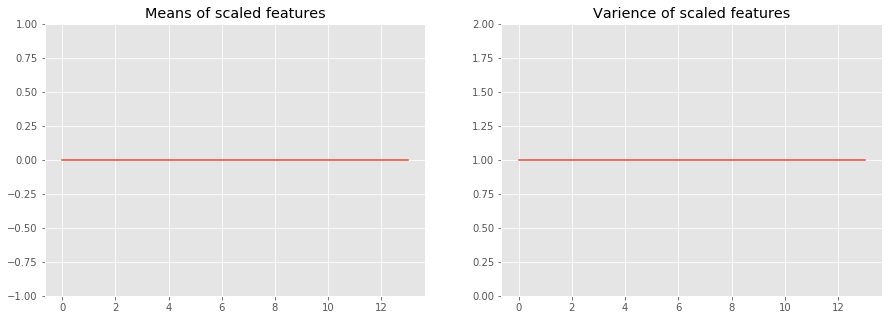

In [46]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

dataset is well standardised

# Model Building

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.25)

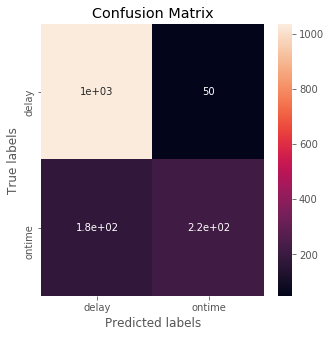

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression()
LR.fit(X_train, y_train)
y_pred_LR=LR.predict(X_test)

plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

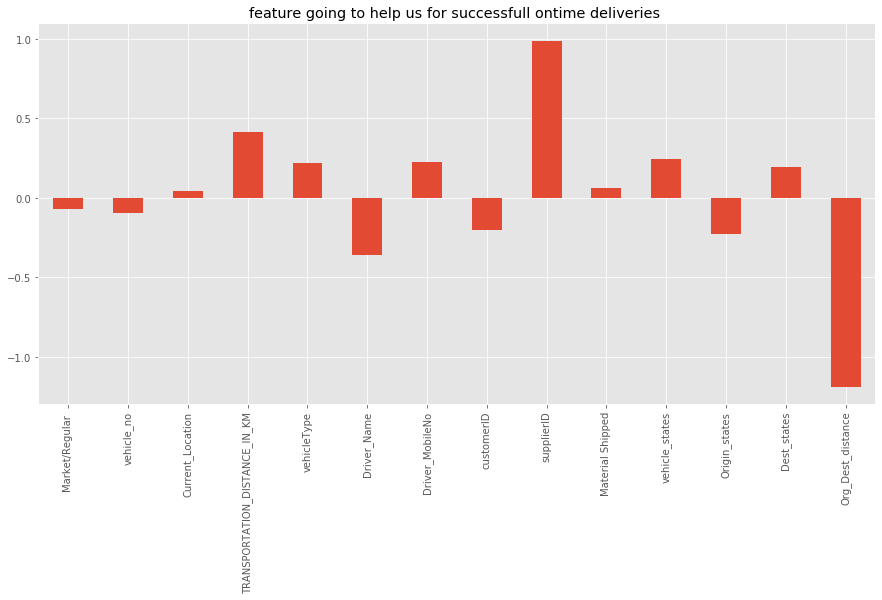

In [49]:
#selecting most helpfull features
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(LR.coef_[0], index=['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID', 'Material Shipped',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull ontime deliveries ')
fig=params_weight.get_figure()
plt.show()

Parameters that impact on ontime delivery:

Current location, 
Transportation distance, 
Vehicle state, 
Vehicle type, 
Driver mobile number, 
Supplier, 
material shipped, 
Destination state.

In [119]:
#ANOVA(analysis pf variance)
y = data['ontime']

# Ordinary Least Squares (OLS) model
model = ols('y ~ C(Q("Origin_Location"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => ontime/delay - Origin Location")
display(anova_table)

model = ols('y ~ C(Q("Destination_Location"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => ontime/delay - Destination Location")
display(anova_table)

model = ols('y ~ C(Q("Current_Location"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => ontime/delay - Current Location")
display(anova_table)

model = ols('y ~ C(Q("vehicleType"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => ontime/delay - vehicle Type")
display(anova_table)

model = ols('y ~ C(Q("supplierID"))', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print ("\nAnova => ontime/delay - supplierID")
display(anova_table)


Anova => ontime/delay - Origin Location


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 168, but rank is 86
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(Q(""Origin_Location""))",4.758983e-27,168.0,11.951198,4.672434e-117
Residual,3.564850e-27,1504.0,NaN,NaN



Anova => ontime/delay - Destination Location


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 459, but rank is 135
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(Q(""Destination_Location""))",5.409400e+03,459.0,4.812818e+30,0.0
Residual,3.565318e-27,1456.0,NaN,NaN



Anova => ontime/delay - Current Location


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2566, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(Q(""Current_Location""))",1.023748e-12,2566.0,1.316660e-07,0.999711
Residual,2.824090e-06,932.0,NaN,NaN



Anova => ontime/delay - vehicle Type


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 41, but rank is 29
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(Q(""vehicleType""))",3.290026e-27,41.0,32.363625,2.678103e-137
Residual,3.870447e-27,1561.0,NaN,NaN



Anova => ontime/delay - supplierID


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 273, but rank is 136
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
"C(Q(""supplierID""))",5.098030e-27,273.0,10.127226,1.405699e-133
Residual,2.681104e-27,1454.0,NaN,NaN


The ANOVA output provides an estimate of how much variation in the dependent variable that can be explained by the independent variable.

The first column lists the independent variable along with the model residuals (aka the model error).
The Df column displays the degrees of freedom for the independent variable (calculated by taking the number of levels within the variable and subtracting 1), and the degrees of freedom for the residuals.
The Sum Sq column displays the sum of squares (a.k.a. the total variation) between the group means and the overall mean explained by that variable. The sum of squares for the 'Origon_Location' variable is 632.081512, while the sum of squares of the residuals is 530.975800.
The Mean Sq column is the mean of the sum of squares, which is calculated by dividing the sum of squares by the degrees of freedom.
The F-value column is the test statistic from the F test: The larger the F value, the more likely it is that the variation associated with the independent variable is real and not due to chance.
The Pr(>F) column is the p-value of the F-statistic. This shows how likely it is that the F-value calculated from the test would have occurred if the null hypothesis of no difference among group means were true.
Because the p-value of the independent variable, 'Origon_Location', is significant (p < 0.05), it is likely that fertilizer type does have a significant effect on ontime deliveries.

In [52]:
data_crosstab = pd.crosstab(data['ontime/delay'], data['actual_eta'], 
margins = False)  

stat, p, dof, expected = chi2_contingency(data_crosstab)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.234
Independent (fail to reject H0)


In [53]:
data_crosstab = pd.crosstab(data['ontime/delay'], data['TRANSPORTATION_DISTANCE_IN_KM'], 
margins = False) 

stat, p, dof, expected = chi2_contingency(data_crosstab)

# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.000
Dependent (reject H0)


In [54]:
#saving the changes made to the data into a new csv
data.to_csv('Delivery_truck_trip_data_clean1.csv')

In [160]:
from datetime import datetime
FMT = '%H:%M:%S'
data['ETA'] = data.actual_eta - data.Planned_ETA

In [161]:
data.head(100)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Planned_ETA,...,customerNameCode,supplierID,supplierNameCode,Material Shipped,ontime/delay,vehicle_states,Origin_states,Dest_states,Org_Dest_distance,ETA
148,CONSENT TRACK,AEIBK2027469,Regular,2020-08-26 12:03:46.000,MH14GD9464,"Shive, Pune, Maharashtra","Pondur, Kanchipuram, Tamil Nadu","18.750621,73.87719","12.930429,79.931163",2020-08-30 16:03:46.000,...,Daimler india commercial vehicles pvt lt,67876,OMS LOGISTICS PVT LTD,REGULATOR - 12V,Delay,MH,Maharashtra,Tamil Nadu,913.711784,-3 days +20:44:21.380000
149,VAMOSYS,VCV00014153/082021,Regular,2020-08-27 15:21:48.570,TN30BC9320,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 19:21:48.570,...,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,VALVE SPRING,Delay,TN,Tamil Nadu,Tamil Nadu,0.000000,-4 days +16:52:02.973000
150,VAMOSYS,VCV00014063/082021,Regular,2020-08-27 14:22:17.833,TN30BB1036,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-31 18:22:17.833,...,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,VALVE SPRING,Delay,TN,Tamil Nadu,Tamil Nadu,0.000000,-4 days +17:11:01.210000
151,VAMOSYS,VCV00014741/082021,Regular,2020-08-28 00:32:20.523,TN88D4134,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-09-01 04:32:20.523,...,Daimler india commercial vehicles pvt lt,NSAEXNAMDZ,NAMAKKAL SRI ANJINAYA TRANSPORT,LU HOOD LOCK / RH,Delay,TN,Tamil Nadu,Tamil Nadu,0.000000,-4 days +06:59:09.257000
152,CONSENT TRACK,AEIBK2027446,Regular,2020-08-26 09:55:08.000,GJ01DZ8943,"Khorajnanoda, Ahmedabad, Gujarat","Singaperumalkoil, Kanchipuram, Tamil Nadu","22.961777,72.094219","12.786517,79.975221",2020-08-30 13:55:08.000,...,Ford india private limited,68005,Sterling Translogistics Private Limited,LU LATCH / PIN,Delay,GJ,Gujarat,Tamil Nadu,1401.232229,-2 days +17:14:33.173000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SAILOGISTICS,AEIBK2026884,Regular,2020-08-21 16:27:40.000,HR55AH7233,"Jamalpur, Gurgaon, Haryana","Pondur, Kanchipuram, Tamil Nadu","28.373519,76.835337","12.930429,79.931163",2020-08-25 20:27:40.000,...,Daimler india commercial vehicles pvt lt,999,Unknown,ZB LOCK RH,On-time,HR,Haryana,Tamil Nadu,1739.732407,1 days 17:08:40.870000
246,VAMOSYS,VCV00013217/082021,Regular,2020-08-26 14:40:09.417,TN19AM0312,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-30 18:40:09.417,...,Daimler india commercial vehicles pvt lt,RAGEXKAN82,RAGUL TRANSPORT,AUTO PARTS,Delay,TN,Tamil Nadu,Tamil Nadu,0.000000,-4 days +17:53:35.730000
247,CONSENT TRACK,AEIBK2026827,Regular,2020-08-20 14:12:56.000,TN60D8749,"Vellaripatti, Madurai, Tamil Nadu","Devalapura, Mysore, Karnataka","9.973636,78.281783","12.223062,76.690357",2020-08-24 18:12:56.000,...,Tvs srichakra limited,67985,SREE SAIRAM LOGISTICS,"4""O CLAMP",On-time,TN,Tamil Nadu,Karnataka,303.540541,2 days 21:08:57.610000
248,CONSENT TRACK,AEIBK2026483,Regular,2020-08-19 10:12:06.000,HR55AJ4101,"Jamalpur, Gurgaon, Haryana","Pondur, Kanchipuram, Tamil Nadu","28.373519,76.835337","12.930429,79.931163",2020-08-23 14:12:06.000,...,Daimler india commercial vehicles pvt lt,75656,R.Sai logistics india PVT.LTD,STRAP 300X6,On-time,HR,Haryana,Tamil Nadu,1739.732407,4 days 02:14:49.410000
